## Preparing optimization

For any model optimization problem with parameters we need:

- An objective function that we want to minimize or maximize
- Domain space for relevant parameters
- A hyperparameter evaluating function 
- Trials (recording scores and parameters for each iteration)

Bayesian optimization makes informed decisions about the next set of parameters to choose based on a constructed
probability model of the surrogate function itself

In [4]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [33]:
## Model one polynomial function with a local minimum over a given range
## Objective: minimize the output of this function using optimization methods

def objective(x):
    ''' 
    Make a bizarre polynomial to work with
    '''
    
    f = np.poly1d([15, -22, -280, 381, 112, -26, 100])
    
    return f(x)

Minimum of -17752.3377 occurs at -3.4322


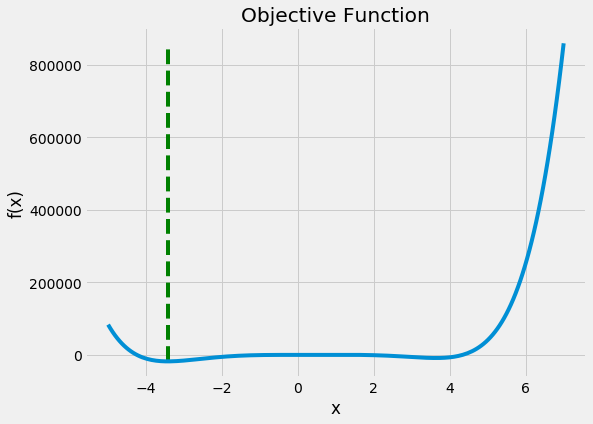

In [34]:
x = np.linspace(-5,7, 200)
y = objective(x)

miny = min(y)
minx = x[np.argmin(y)]

plt.figure(figsize = (8, 6))
plt.style.use('fivethirtyeight')
plt.title('Objective Function'); plt.xlabel('x'); plt.ylabel('f(x)')
plt.vlines(minx, min(y)- 50, max(y), linestyles = '--', colors = 'g')
plt.plot(x, y);

# Print out the minimum of the function and value
print('Minimum of %0.4f occurs at %0.4f' % (miny, minx))

In [ ]:
## Domain

from hyperopt import hp

space = hp.uniform('x', -5, 7)
